In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

import warnings

warnings.filterwarnings("ignore")

In [49]:
df = yf.download(
    'CL=F', 
    start='2003-12-31', 
    end='2023-12-31',
    progress=False
)[['Adj Close', 'Volume']]

# add log returns
df['log_ret'] = np.log(df['Adj Close']).diff()

# add 5-day std
df['5d_std'] = df['log_ret'].rolling(10).std()

display(df)

,Adj Close,Volume,log_ret,5d_std
Date,,,,
2003-12-31,32.520000,66694,NaN,NaN
2004-01-05,33.779999,105704,0.038014,NaN
2004-01-06,33.700001,103405,-0.002371,NaN
2004-01-07,33.619999,81675,-0.002377,NaN
2004-01-08,33.980000,92709,0.010651,NaN
...,...,...,...,...
2023-12-22,73.559998,222600,-0.004476,0.018229
2023-12-26,75.570000,208715,0.026958,0.019676
2023-12-27,74.110001,253323,-0.019509,0.015293


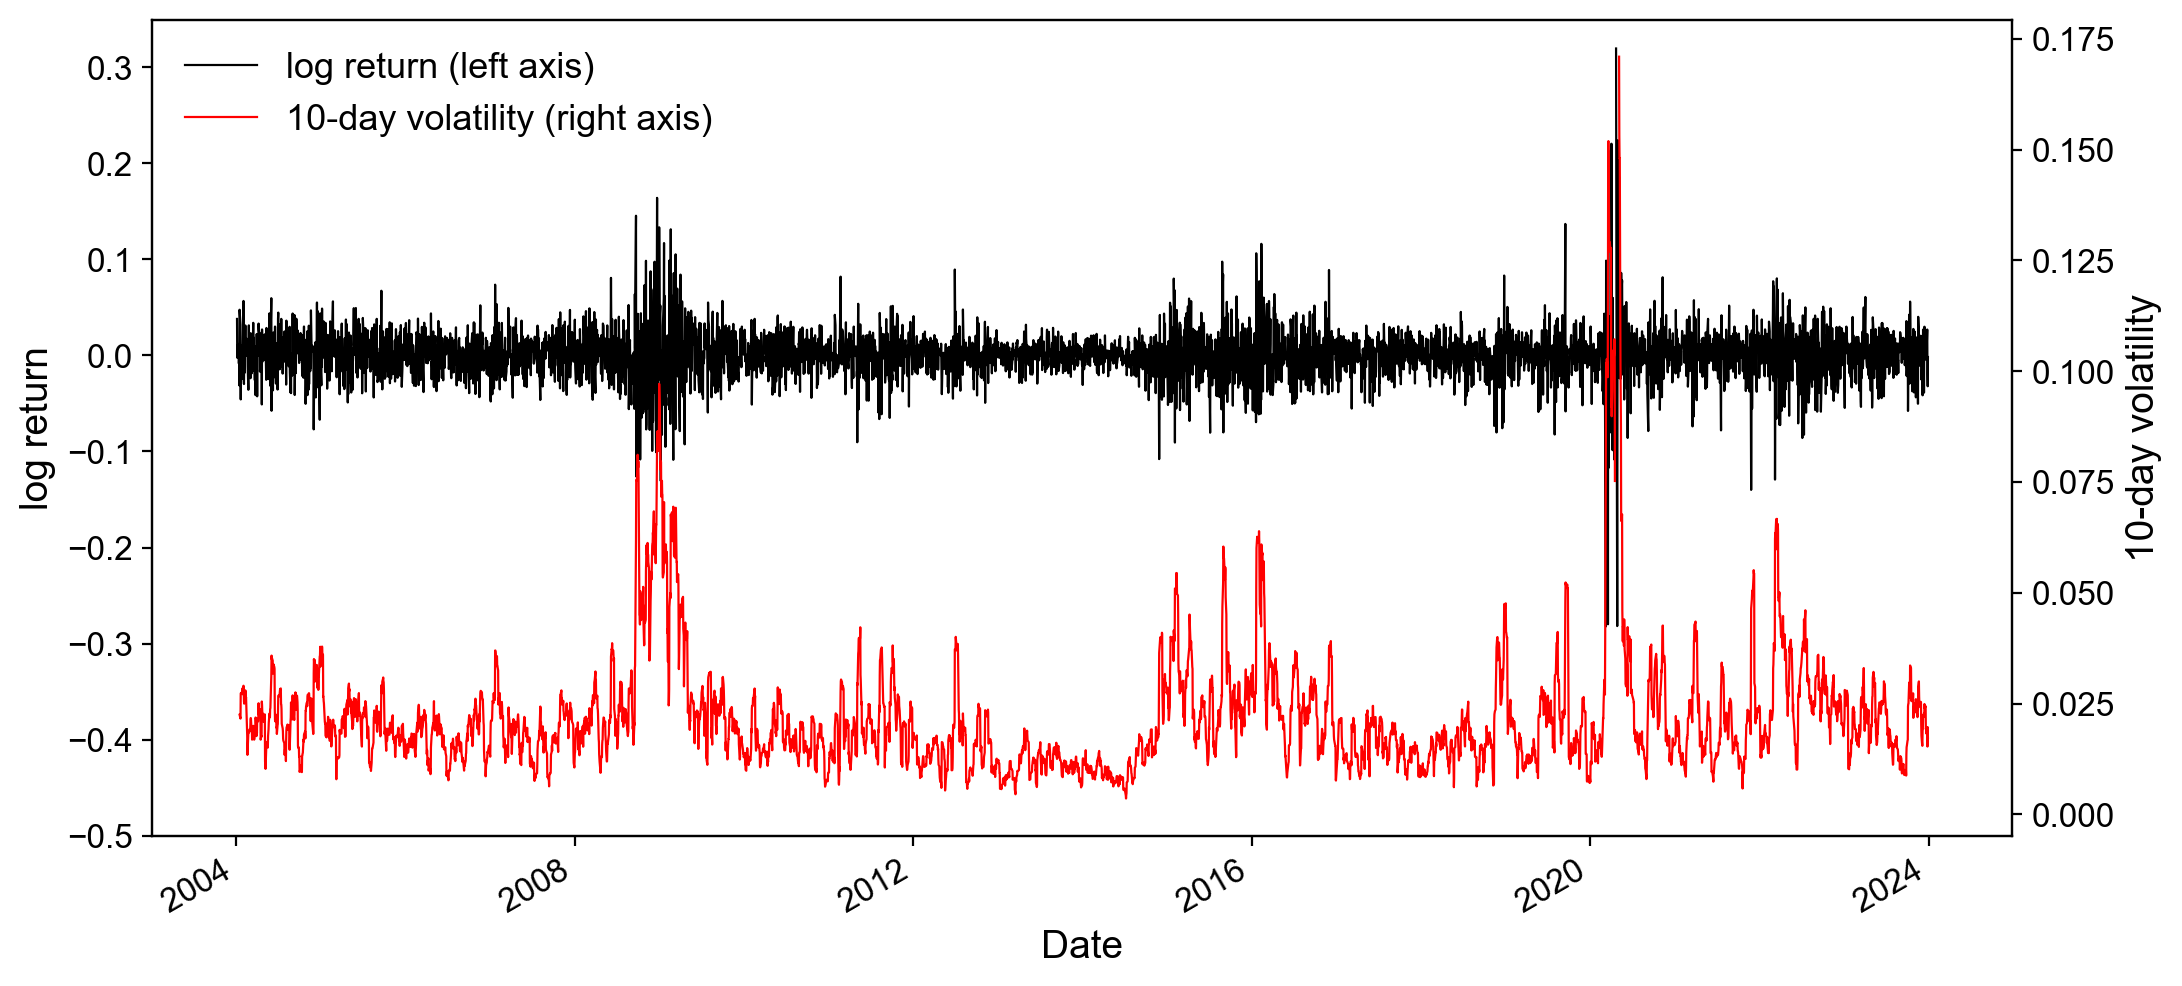

In [52]:
# set font to Arial
plt.rcParams['font.family'] = 'Arial'

fig, ax1 = plt.subplots(figsize=(12, 6), dpi=200)
ax2 = ax1.twinx()

df['log_ret'].plot(ax=ax1, color='black', lw=0.8, label='log return (left axis)')
df['5d_std'].plot(ax=ax2, color='red', lw=0.8, label='10-day volatility (right axis)')

ax1.set_ylabel('log return', fontsize=14)
ax2.set_ylabel('10-day volatility', fontsize=14)
ax1.set_xlabel('Date', fontsize=14)

ax1.set_ylim(bottom=-0.5)

# increase size of x-ticks
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

# combine labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0, fontsize=13, frameon=False)

# save plot as png
plt.savefig('log_ret_10d_vol.png', bbox_inches='tight')